In [1]:
import sys, os

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.conf.binary_entropy_conf import BinaryEntropyConf
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
# from hydra import compose, initialize
# from omegaconf import OmegaConf

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


In [2]:
#Generate data and run algorithms
h_targets = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
results = {}

for h in h_targets:
    data = BinaryEntropyConf.generate_data_rolling_ate(2, uniform_confounder_entropy=True, noise=False, h_target=h)
    scenario = BinaryEntropyConf(data)
    ATE_algs = ['ATE_tianpearl', 'ATE_entropybounds-trueTheta']
    PNS_algs = ['PNS_tianpearl', 'PNS_entropybounds-trueTheta']
    algs = ATE_algs + PNS_algs
    scenario.run()
    scenario.data
    results[h] = scenario.data

results_df = pd.concat(results.values(), ignore_index=True)
results_df

Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.06 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.02 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.03 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 8.77 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 3.04 seconds.
Running ATE_autobound...
ATE_autobound completed in 4.67 seconds.
Running PNS_autobound...
PNS_autobound completed in 0.91 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 1.03 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 1.48 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 1.69 seconds.
Running PNS_entropybounds-0.80...
PNS_entropybounds-0.80 completed in 0.12 seconds.
Running PNS_entropybounds-0.20...
PNS_entropybounds-0.20 completed in 0.62 seconds.
Running PNS_entropybounds-0.10...
PNS_entropybounds-0.10 completed in 0.74 seconds.
Running PNS_entropybounds-trueTh

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 20.21 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 16.00 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.02 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.01 seconds.
Running ATE_manski...
ATE_manski completed in 0.02 seconds.
Total runtime: 63.25 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.05 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.04 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.02 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.44 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 2.90 seconds.
Running ATE_autobound...
ATE_autobound completed in 1.04 seconds.
Running PNS_autobound...
PNS_autobound completed in 0.84 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.40 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 0.60 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 0.69 seconds.
Running PNS_ent

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 19.33 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 18.61 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.02 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.01 seconds.
Running ATE_manski...
ATE_manski completed in 0.03 seconds.
Total runtime: 52.35 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.03 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.02 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.01 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.22 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 3.64 seconds.
Running ATE_autobound...
ATE_autobound completed in 3.44 seconds.
Running PNS_autobound...
PNS_autobound completed in 1.80 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.23 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 1.21 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 1.17 seconds.
Running PNS_ent

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 25.94 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 23.32 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.05 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.03 seconds.
Running ATE_manski...
ATE_manski completed in 0.02 seconds.
Total runtime: 66.83 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.08 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.03 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.03 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.91 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 9.28 seconds.
Running ATE_autobound...
ATE_autobound completed in 0.92 seconds.
Running PNS_autobound...
PNS_autobound completed in 1.02 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.28 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 0.33 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 0.28 seconds.
Running PNS_ent

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 19.08 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 19.92 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.02 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.02 seconds.
Running ATE_manski...
ATE_manski completed in 0.02 seconds.
Total runtime: 56.49 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.02 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.02 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.03 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.05 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 3.70 seconds.
Running ATE_autobound...
ATE_autobound completed in 0.97 seconds.
Running PNS_autobound...
PNS_autobound completed in 0.91 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.48 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 1.60 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 2.04 seconds.
Running PNS_ent

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 19.27 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 20.05 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.02 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.03 seconds.
Running ATE_manski...
ATE_manski completed in 0.02 seconds.
Total runtime: 57.12 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.03 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.04 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.04 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.24 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 3.18 seconds.
Running ATE_autobound...
ATE_autobound completed in 1.03 seconds.
Running PNS_autobound...
PNS_autobound completed in 0.96 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.53 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 0.69 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 0.76 seconds.
Running PNS_ent

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 19.92 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 16.88 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.01 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.02 seconds.
Running ATE_manski...
ATE_manski completed in 0.02 seconds.
Total runtime: 52.70 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.02 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.02 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.02 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.09 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 3.00 seconds.
Running ATE_autobound...
ATE_autobound completed in 0.88 seconds.
Running PNS_autobound...
PNS_autobound completed in 0.86 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.35 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 0.77 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 0.74 seconds.
Running PNS_ent

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 18.26 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 19.07 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.02 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.02 seconds.
Running ATE_manski...
ATE_manski completed in 0.02 seconds.
Total runtime: 50.21 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.05 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.03 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.03 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.57 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 3.74 seconds.
Running ATE_autobound...
ATE_autobound completed in 1.08 seconds.
Running PNS_autobound...
PNS_autobound completed in 0.96 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.24 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 1.32 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 1.67 seconds.
Running PNS_ent

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 17.75 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 17.27 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.03 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.02 seconds.
Running ATE_manski...
ATE_manski completed in 0.01 seconds.
Total runtime: 49.73 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.02 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.04 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.04 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.24 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 3.07 seconds.
Running ATE_autobound...
ATE_autobound completed in 0.93 seconds.
Running PNS_autobound...
PNS_autobound completed in 0.92 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.29 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 0.68 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 0.88 seconds.
Running PNS_ent

d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 18.81 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 21.10 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.02 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.03 seconds.
Running ATE_manski...
ATE_manski completed in 0.04 seconds.
Total runtime: 51.72 seconds.
Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.04 seconds.
Running ATE_OLS-0.98...
ATE_OLS-0.98 completed in 0.03 seconds.
Running ATE_OLS-0.95...
ATE_OLS-0.95 completed in 0.03 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 3.31 seconds.
Running PNS_causaloptim...
PNS_causaloptim completed in 3.03 seconds.
Running ATE_autobound...
ATE_autobound completed in 0.85 seconds.
Running PNS_autobound...
PNS_autobound completed in 0.84 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.38 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 1.12 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 1.47 seconds.
Running PNS_ent

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ATE_entropybounds-randomTheta completed in 2.07 seconds.
Running ATE_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

ATE_zaffalonbounds completed in 16.99 seconds.
Running PNS_zaffalonbounds...


d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[results_df.columns] = results_df
d:\TUM Workspace\Thesis Workspace\causal-bounds\BinEntropyConf\..\simulation_engine\algorithms\zaffalonbounds.py:30: PerformanceWarn

PNS_zaffalonbounds completed in 15.84 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.02 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.02 seconds.
Running ATE_manski...
ATE_manski completed in 0.02 seconds.
Total runtime: 49.87 seconds.


,seed,intercept_X,intercept_Y,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,U,X,Y,epsilon_X,epsilon_Y,noise,entropy_U,entropy_X,entropy_Y,squasher_X_name,squasher_Y_name,heteroskedasticity_structure,ATE_OLS-0.99_bound_lower,ATE_OLS-0.99_bound_upper,ATE_OLS-0.99_bound_valid,ATE_OLS-0.99_bound_width,ATE_OLS-0.99_bound_failed,ATE_OLS-0.98_bound_lower,ATE_OLS-0.98_bound_upper,ATE_OLS-0.98_bound_valid,ATE_OLS-0.98_bound_width,ATE_OLS-0.98_bound_failed,ATE_OLS-0.95_bound_lower,ATE_OLS-0.95_bound_upper,ATE_OLS-0.95_bound_valid,ATE_OLS-0.95_bound_width,ATE_OLS-0.95_bound_failed,ATE_causaloptim_bound_lower,ATE_causaloptim_bound_upper,ATE_causaloptim_bound_valid,ATE_causaloptim_bound_width,ATE_causaloptim_bound_failed,PNS_causaloptim_bound_lower,PNS_causaloptim_bound_upper,PNS_causaloptim_bound_valid,PNS_causaloptim_bound_width,PNS_causaloptim_bound_failed,ATE_autobound_bound_lower,ATE_autobound_bound_upper,ATE_autobound_bound_valid,ATE_autobound_bound_width,ATE_autobound_bound_failed,PNS_autobound_bound_lower,PNS_autobound_bound_upper,PNS_autobound_bound_valid,PNS_autobound_bound_width,PNS_autobound_bound_failed,ATE_entropybounds-0.80_bound_lower,ATE_entropybounds-0.80_bound_upper,ATE_entropybounds-0.80_bound_valid,ATE_entropybounds-0.80_bound_width,ATE_entropybounds-0.80_bound_failed,ATE_entropybounds-0.80_theta,ATE_entropybounds-0.20_bound_lower,ATE_entropybounds-0.20_bound_upper,ATE_entropybounds-0.20_bound_valid,ATE_entropybounds-0.20_bound_width,ATE_entropybounds-0.20_bound_failed,ATE_entropybounds-0.20_theta,ATE_entropybounds-0.10_bound_lower,ATE_entropybounds-0.10_bound_upper,ATE_entropybounds-0.10_bound_valid,ATE_entropybounds-0.10_bound_width,ATE_entropybounds-0.10_bound_failed,ATE_entropybounds-0.10_theta,PNS_entropybounds-0.80_bound_lower,PNS_entropybounds-0.80_bound_upper,PNS_entropybounds-0.80_bound_valid,PNS_entropybounds-0.80_bound_width,PNS_entropybounds-0.80_bound_failed,PNS_entropybounds-0.80_theta,PNS_entropybounds-0.20_bound_lower,PNS_entropybounds-0.20_bound_upper,PNS_entropybounds-0.20_bound_valid,PNS_entropybounds-0.20_bound_width,PNS_entropybounds-0.20_bound_failed,PNS_entropybounds-0.20_theta,PNS_entropybounds-0.10_bound_lower,PNS_entropybounds-0.10_bound_upper,PNS_entropybounds-0.10_bound_valid,PNS_entropybounds-0.10_bound_width,PNS_entropybounds-0.10_bound_failed,PNS_entropybounds-0.10_theta,PNS_entropybounds-trueTheta_bound_lower,PNS_entropybounds-trueTheta_bound_upper,PNS_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_width,PNS_entropybounds-trueTheta_bound_failed,PNS_entropybounds-trueTheta_theta,ATE_entropybounds-trueTheta_bound_lower,ATE_entropybounds-trueTheta_bound_upper,ATE_entropybounds-trueTheta_bound_valid,ATE_entropybounds-trueTheta_bound_width,ATE_entropybounds-trueTheta_bound_failed,ATE_entropybounds-trueTheta_theta,PNS_entropybounds-randomTheta_bound_lower,PNS_entropybounds-randomTheta_bound_upper,PNS_entropybounds-randomTheta_bound_valid,PNS_entropybounds-randomTheta_bound_width,PNS_entropybounds-randomTheta_bound_failed,PNS_entropybounds-randomTheta_theta,ATE_entropybounds-randomTheta_bound_lower,ATE_entropybounds-randomTheta_bound_upper,ATE_entropybounds-randomTheta_bound_valid,ATE_entropybounds-randomTheta_bound_width,ATE_entropybounds-randomTheta_bound_failed,ATE_entropybounds-randomTheta_theta,ATE_zaffalonbounds_bound_lower,ATE_zaffalonbounds_bound_upper,ATE_zaffalonbounds_bound_valid,ATE_zaffalonbounds_bound_width,ATE_zaffalonbounds_bound_failed,PNS_zaffalonbounds_bound_lower,PNS_zaffalonbounds_bound_upper,PNS_zaffalonbounds_bound_valid,PNS_zaffalonbounds_bound_width,PNS_zaffalonbounds_bound_failed,ATE_tianpearl_bound_lower,ATE_tianpearl_bound_upper,ATE_tianpearl_bound_width,ATE_tianpearl_bound_failed,ATE_tianpearl_bound_valid,PNS_tianpearl_bound_lower,PNS_tianpearl_bound_upper,PNS_tianpearl_bound_width,PNS_tianpearl_bound_failed,PNS_tianpearl_bound_valid,ATE_manski_bound_lower,ATE_manski_bound_upper,ATE_manski_bound_width,ATE_manski_bound_failed,ATE_

In [13]:
results = pd.read_pickle("N2000/results_array.pkl")
results_df = pd.read_pickle("N2000/results_df.pkl")
h_targets = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]


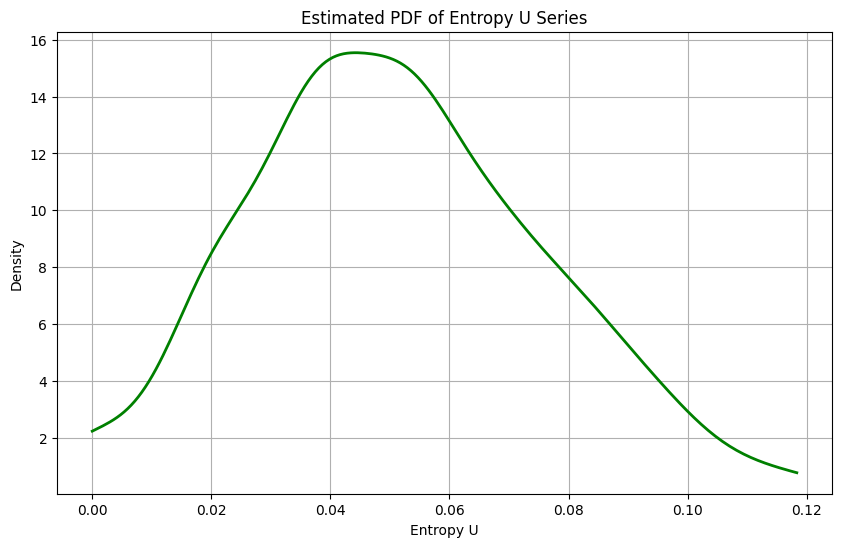

In [11]:
from scipy.stats import gaussian_kde
import numpy as np

series = results[0.05]['entropy_U']
density = gaussian_kde(series)
xs = np.linspace(series.min(), series.max(), 200)

plt.figure(figsize=(10, 6))
plt.plot(xs, density(xs), color='g', lw=2)
plt.title('Estimated PDF of Entropy U Series')
plt.xlabel('Entropy U')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Bar chart with invalids

In [15]:
import pandas as pd
from IPython.display import display

tighter_df = pd.DataFrame()

for h in h_targets:
    n = len(results[h])
    h_df = pd.DataFrame({'h': [h]*n})
    # if ATE_entropybounds-trueTheta is valid, not failed and ATE_entropybounds-trueTheta_bound_width is smaller than ATE_tianpearl_bound_width
    # then ATE_winner is ATE_entropybounds-trueTheta
    # if both are failed or invalid, then ATE_winner is None
    # else the ATE_winner is ATE_tianpearl
    h_df['ATE_winner'] = results[h].apply(
        lambda row: (
            'ATE_entropybounds-trueTheta_isValid' if (
                row['ATE_entropybounds-trueTheta_bound_valid'] and not row['ATE_entropybounds-trueTheta_bound_failed'] and row['ATE_entropybounds-trueTheta_bound_width'] < row['ATE_tianpearl_bound_width']
            ) else (
                'ATE_entropybounds-trueTheta_isInvalid' if (
                    not row['ATE_entropybounds-trueTheta_bound_valid'] or row['ATE_entropybounds-trueTheta_bound_failed']
                ) else (
                    'ATE_tianpearl_isValid' if (
                        row['ATE_tianpearl_bound_valid'] and not row['ATE_tianpearl_bound_failed']
                    ) else 'ATE_tianpearl_isInvalid'
                )
            )
        ), axis=1
    ).values

    h_df['PNS_winner'] = results[h].apply(
        lambda row: (
            'PNS_entropybounds-trueTheta_isValid' if (
                row['PNS_entropybounds-trueTheta_bound_valid'] and not row['PNS_entropybounds-trueTheta_bound_failed'] and row['PNS_entropybounds-trueTheta_bound_width'] < row['PNS_tianpearl_bound_width']
            ) else (
                'PNS_entropybounds-trueTheta_isInvalid' if (
                    not row['PNS_entropybounds-trueTheta_bound_valid'] or row['PNS_entropybounds-trueTheta_bound_failed']
                ) else (
                    'PNS_tianpearl_isValid' if (
                        row['PNS_tianpearl_bound_valid'] and not row['PNS_tianpearl_bound_failed']
                    ) else 'PNS_tianpearl_isInvalid'
                )
            )
        ), axis=1
    ).values
    #diagnostics
    h_df['entropy_U'] = results[h]['entropy_U']
    h_df['ATE_entropybounds-trueTheta_bound_valid'] = results[h]['ATE_entropybounds-trueTheta_bound_valid']
    h_df['PNS_entropybounds-trueTheta_bound_valid'] = results[h]['PNS_entropybounds-trueTheta_bound_valid']
    h_df['ATE_tianpearl_bound_valid'] = results[h]['ATE_tianpearl_bound_valid']
    h_df['PNS_tianpearl_bound_valid'] = results[h]['PNS_tianpearl_bound_valid']


    tighter_df = pd.concat([tighter_df, h_df], ignore_index=True)


# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(tighter_df)

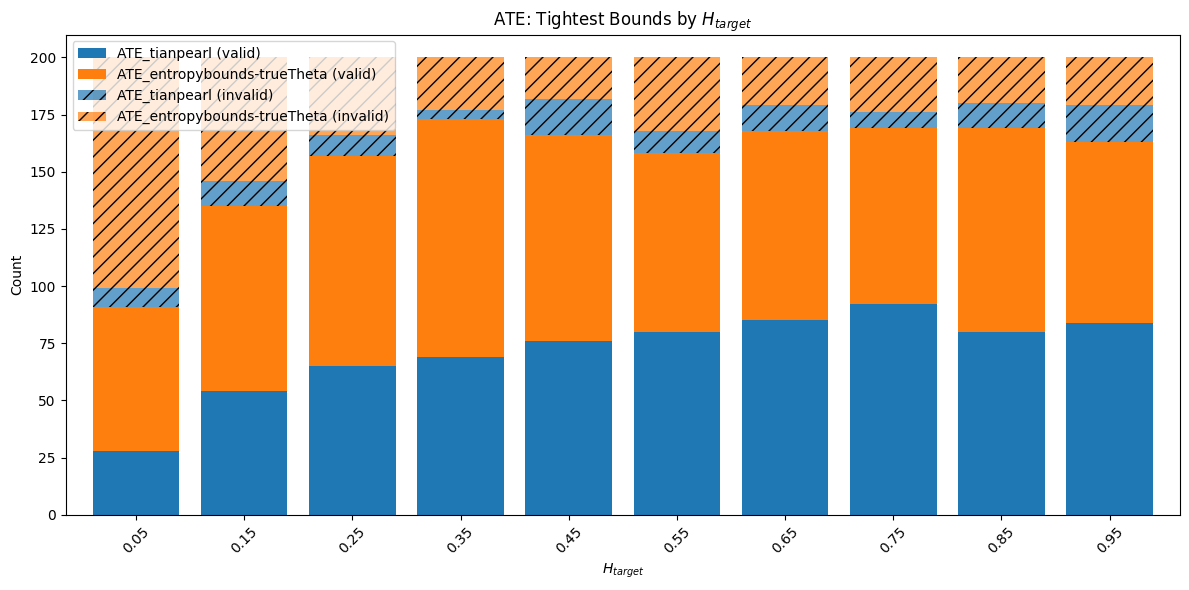

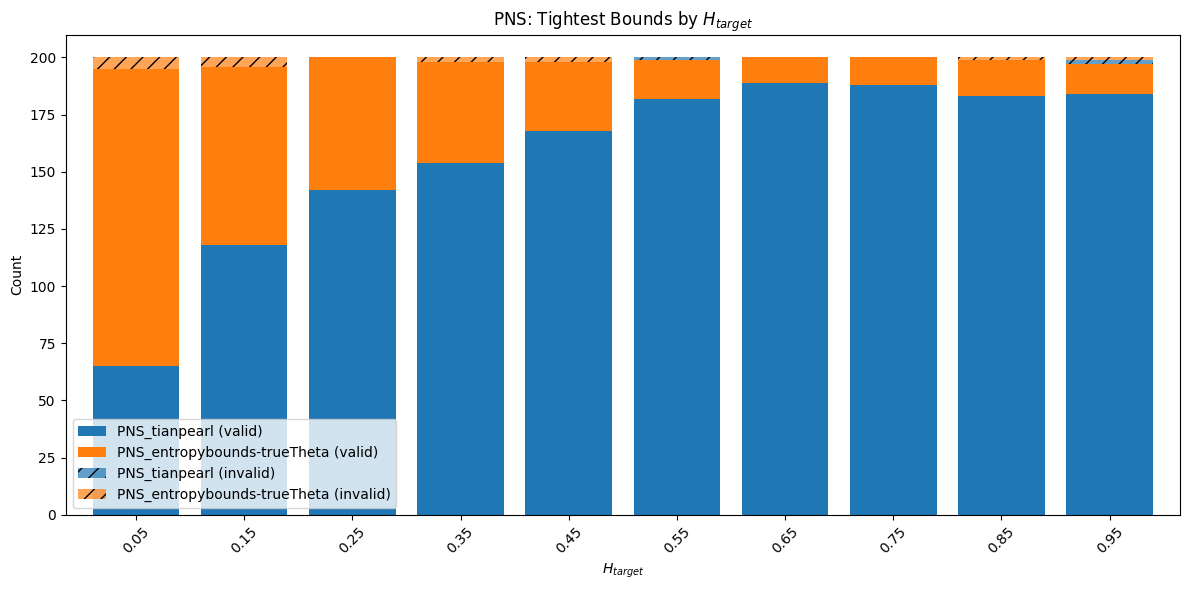

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# --- ATE ---
ate_counts = tighter_df.groupby(['h', 'ATE_winner']).size().unstack(fill_value=0)
for col in ['ATE_tianpearl_isValid', 'ATE_tianpearl_isInvalid', 'ATE_entropybounds-trueTheta_isValid', 'ATE_entropybounds-trueTheta_isInvalid']:
    if col not in ate_counts.columns:
        ate_counts[col] = 0
ate_counts = ate_counts[['ATE_tianpearl_isValid', 'ATE_entropybounds-trueTheta_isValid', 'ATE_tianpearl_isInvalid', 'ATE_entropybounds-trueTheta_isInvalid']]

colors = ['#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e']
hatches = [None, None, '//', '//']
labels = [
    'ATE_tianpearl (valid)', 
    'ATE_entropybounds-trueTheta (valid)', 
    'ATE_tianpearl (invalid)', 
    'ATE_entropybounds-trueTheta (invalid)'
]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ate_counts.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax,
    width=0.8,
    legend=False
)

# Add hatching for invalid bars
for i, patch_list in enumerate(ax.containers):
    if hatches[i]:
        for patch in patch_list:
            patch.set_hatch(hatches[i])
            patch.set_alpha(0.7)
    else:
        for patch in patch_list:
            patch.set_alpha(1.0)

ax.set_title('ATE: Tightest Bounds by $H_{target}$')
ax.set_xlabel('$H_{target}$')
ax.set_ylabel('Count')
ax.set_xticklabels([f"{x:.2f}" for x in ate_counts.index], rotation=45)
ax.legend(labels)
plt.tight_layout()
plt.show()

# --- PNS ---
pns_counts = tighter_df.groupby(['h', 'PNS_winner']).size().unstack(fill_value=0)
for col in ['PNS_tianpearl_isValid', 'PNS_tianpearl_isInvalid', 'PNS_entropybounds-trueTheta_isValid', 'PNS_entropybounds-trueTheta_isInvalid']:
    if col not in pns_counts.columns:
        pns_counts[col] = 0
pns_counts = pns_counts[['PNS_tianpearl_isValid', 'PNS_entropybounds-trueTheta_isValid', 'PNS_tianpearl_isInvalid', 'PNS_entropybounds-trueTheta_isInvalid']]

labels_pns = [
    'PNS_tianpearl (valid)', 
    'PNS_entropybounds-trueTheta (valid)', 
    'PNS_tianpearl (invalid)', 
    'PNS_entropybounds-trueTheta (invalid)'
]

fig, ax = plt.subplots(figsize=(12, 6))
bars = pns_counts.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax,
    width=0.8,
    legend=False
)

for i, patch_list in enumerate(ax.containers):
    if hatches[i]:
        for patch in patch_list:
            patch.set_hatch(hatches[i])
            patch.set_alpha(0.7)
    else:
        for patch in patch_list:
            patch.set_alpha(1.0)

ax.set_title('PNS: Tightest Bounds by $H_{target}$')
ax.set_xlabel('$H_{target}$')
ax.set_ylabel('Count')
ax.set_xticklabels([f"{x:.2f}" for x in pns_counts.index], rotation=45)
ax.legend(labels_pns)
plt.tight_layout()
plt.show()

### Simple Bar Chart from Paper

In [17]:
import pandas as pd
from IPython.display import display

tighter_df = pd.DataFrame()

for h in h_targets:
    n = len(results[h])
    h_df = pd.DataFrame({'h': [h]*n})
    # if ATE_entropybounds-trueTheta is valid, not failed and ATE_entropybounds-trueTheta_bound_width is smaller than ATE_tianpearl_bound_width
    # then ATE_winner is ATE_entropybounds-trueTheta
    # if both are failed or invalid, then ATE_winner is None
    # else the ATE_winner is ATE_tianpearl
    h_df['ATE_winner'] = results[h].apply(
        lambda row: 'ATE_entropybounds-trueTheta' if (row['ATE_entropybounds-trueTheta_bound_valid'] and not row['ATE_entropybounds-trueTheta_bound_failed'] and row['ATE_entropybounds-trueTheta_bound_width'] < row['ATE_tianpearl_bound_width']) else (
            'ATE_tianpearl' if (row['ATE_tianpearl_bound_valid'] and not row['ATE_tianpearl_bound_failed']) else None
        ), axis=1).values
    h_df['PNS_winner'] = results[h].apply(
        lambda row: 'PNS_entropybounds-trueTheta' if (row['PNS_entropybounds-trueTheta_bound_valid'] and not row['PNS_entropybounds-trueTheta_bound_failed'] and row['PNS_entropybounds-trueTheta_bound_width'] < row['PNS_tianpearl_bound_width']) else (
            'PNS_tianpearl' if (row['PNS_tianpearl_bound_valid'] and not row['PNS_tianpearl_bound_failed']) else None
        ), axis=1).values
    
    #diagnostics
    h_df['entropy_U'] = results[h]['entropy_U']
    h_df['ATE_entropybounds-trueTheta_bound_valid'] = results[h]['ATE_entropybounds-trueTheta_bound_valid']
    h_df['PNS_entropybounds-trueTheta_bound_valid'] = results[h]['PNS_entropybounds-trueTheta_bound_valid']
    h_df['ATE_tianpearl_bound_valid'] = results[h]['ATE_tianpearl_bound_valid']
    h_df['PNS_tianpearl_bound_valid'] = results[h]['PNS_tianpearl_bound_valid']


    tighter_df = pd.concat([tighter_df, h_df], ignore_index=True)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(tighter_df)

,h,ATE_winner,PNS_winner,entropy_U,ATE_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_valid,ATE_tianpearl_bound_valid,PNS_tianpearl_bound_valid
0,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.020814,False,True,True,True
1,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.052915,True,True,True,True
2,0.05,ATE_entropybounds-trueTheta,PNS_entropybounds-trueTheta,0.080793,True,True,True,True
3,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.020814,False,True,True,True
4,0.05,ATE_entropybounds-trueTheta,PNS_entropybounds-trueTheta,0.037622,True,True,True,True
5,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,-0.000000,False,True,True,True
6,0.05,ATE_tianpearl,PNS_entropybounds-trueTheta,0.052915,False,True,True,True
7,0.05,ATE_entropybounds-trueTheta,PNS_entropybounds-trueTheta,0.080793,True,True,True,True
8,0.05,ATE_tianpearl,PNS_tianpearl,-0.000000,False,False,True,True
9,0.05,ATE_entropybounds-trueTheta,PNS_entropybounds-trueTheta,0.037622,True,True,True,True


<Figure size 1200x600 with 0 Axes>

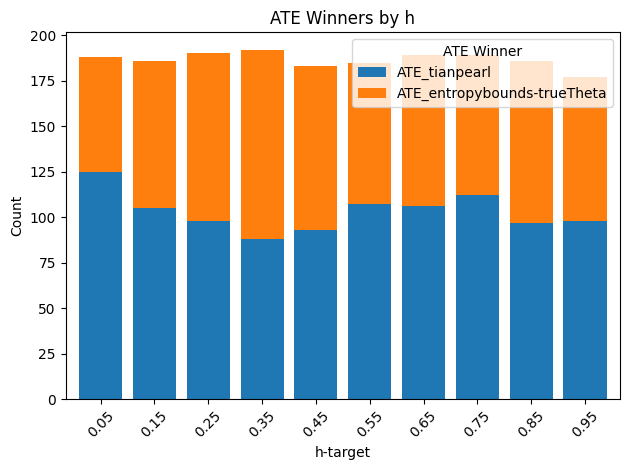

<Figure size 1200x600 with 0 Axes>

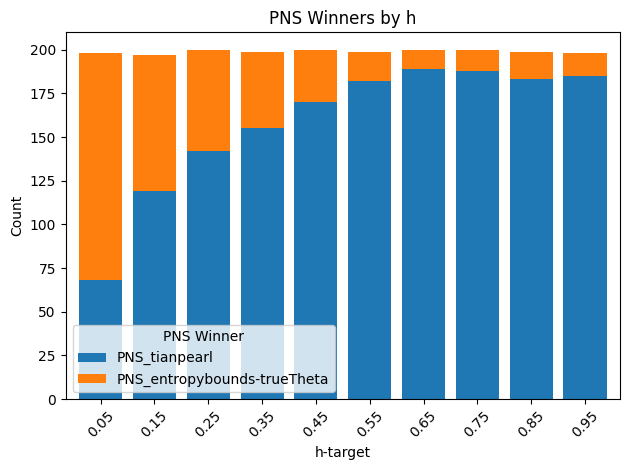

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Count winners per h for ATE
ate_counts = tighter_df.groupby(['h', 'ATE_winner']).size().unstack(fill_value=0)
ate_counts = ate_counts[['ATE_tianpearl', 'ATE_entropybounds-trueTheta']].fillna(0)

ate_counts

# Plot ATE winners
plt.figure(figsize=(12, 6))
ate_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('ATE Winners by h')
plt.xlabel('h-target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='ATE Winner')
plt.tight_layout()
plt.show()


# Count winners per h for PNS
pns_counts = tighter_df.groupby(['h', 'PNS_winner']).size().unstack(fill_value=0)
pns_counts = pns_counts[['PNS_tianpearl', 'PNS_entropybounds-trueTheta']].fillna(0)
# Plot PNS winners
plt.figure(figsize=(12, 6))
pns_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('PNS Winners by h')
plt.xlabel('h-target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='PNS Winner')
plt.tight_layout()
plt.show()

In [31]:
subset = results[0.05]  # Assuming you want to filter results for h=0.05
subset.shape[0]

200

                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
ATE_entropybounds-trueTheta          0.50            50.25          0.6200      1.3169          7.68
         ATE_zaffalonbounds          0.00             6.00          0.7233      0.7999          0.71
              ATE_autobound          0.00             1.00          1.0000      1.0100          0.51
            ATE_causaloptim          0.00             1.00          1.0000      1.0100          0.51
              ATE_tianpearl          0.00             6.00          1.0097      1.0691          6.94
                 ATE_manski          0.00             0.00          1.6473      1.6473           N/A


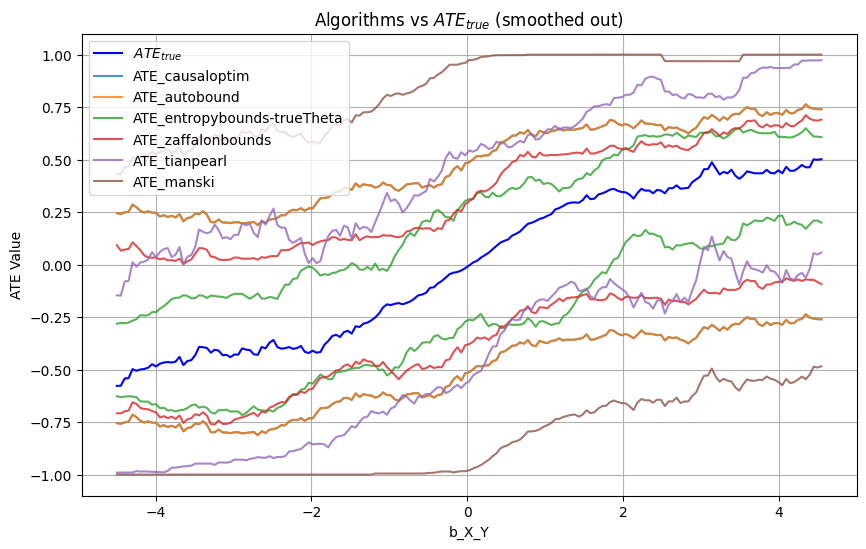

In [29]:
#ATE Evaluation
algs_to_drop = ['ATE_OLS-0.95', 'ATE_OLS-0.98', 'ATE_OLS-0.99', 'ATE_entropybounds-0.10', 'ATE_entropybounds-0.20', 'ATE_entropybounds-0.80', 'ATE_entropybounds-randomTheta']
ATE_algs = PlottingUtil.extract_algorithm_names(subset, 'ATE')
ATE_algs = [alg for alg in ATE_algs if alg not in algs_to_drop]
PlottingUtil.print_bound_statistics_table(subset, ATE_algs, 'ATE')
PlottingUtil.plot_smoothed_query_vs_bounds(subset, 'ATE', ATE_algs, 20)

                    Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
  PNS_entropybounds-trueTheta          0.00             2.50          0.3619      0.3779          2.83
       PNS_entropybounds-0.10          0.00             1.00          0.4419      0.4475          0.44
           PNS_zaffalonbounds          0.00             1.50          0.4541      0.4623          0.40
              PNS_causaloptim          0.00             1.00          0.4828      0.4880          0.50
                PNS_autobound          0.00             1.00          0.4828      0.4880          0.50
                PNS_tianpearl          0.00             1.00          0.4828      0.4880          0.50
       PNS_entropybounds-0.20          0.00             0.50          0.5093      0.5118          0.88
PNS_entropybounds-randomTheta          0.00             0.50          0.5802      0.5823          0.88
       PNS_entropybounds-0.80          0.00             1.50          0.6

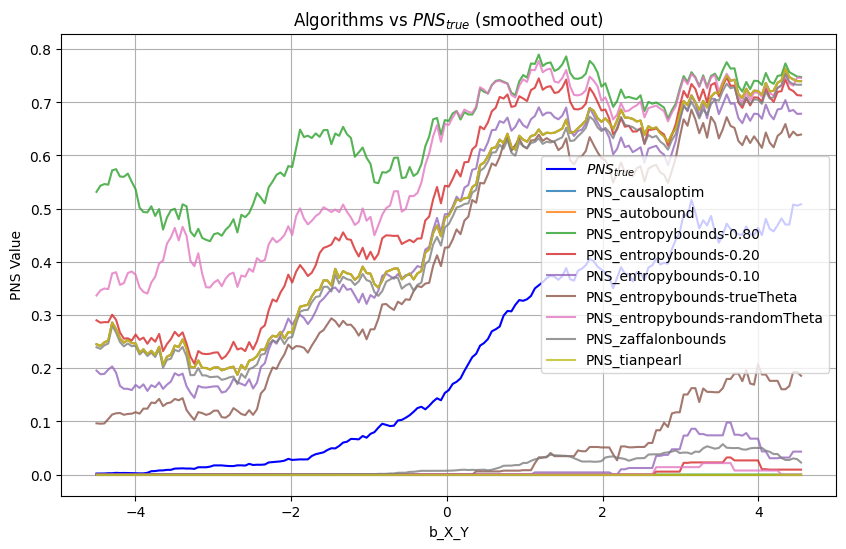

In [ ]:
#PNS Evaluation
PNS_algs = PlottingUtil.extract_algorithm_names(subset, 'PNS')
algs_to_drop = ['PNS_entropybounds-0.10', 'PNS_entropybounds-0.20', 'PNS_entropybounds-0.80', 'PNS_entropybounds-randomTheta']

PlottingUtil.print_bound_statistics_table(subset, PNS_algs, 'PNS')
PlottingUtil.plot_smoothed_query_vs_bounds(subset, 'PNS', PNS_algs, 20)

In [20]:
# randomize b_X_Y as well
data = []
for i in range(2000):
    sim = BinaryIV._simulate_deterministic_data(uniform_confounder_entropy=True)
    data.append(sim)
data = pd.DataFrame(data)
binaryIV = BinaryIV('IV Dag', data)

In [11]:
data['entropy_U'].describe()

count    2000.000000
mean        0.505965
std         0.295366
min        -0.000000
25%         0.251388
50%         0.517753
75%         0.770973
max         0.999988
Name: entropy_U, dtype: float64

## Randomized entropy
* entropy(U) is randomized
* theta is set to true UB(entropy(U))


In [21]:
binaryIV.run(['ATE_entropybounds-trueTheta', 'ATE_tianpearl'])
binaryIV.run(['PNS_entropybounds-trueTheta', 'PNS_tianpearl'])
results = binaryIV.data


Running ATE_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ATE_entropybounds-trueTheta completed in 266.75 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.71 seconds.
Total runtime: 267.46 seconds.
Running PNS_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


PNS_entropybounds-trueTheta completed in 148.47 seconds.
Running PNS_tianpearl...
PNS_tianpearl completed in 0.83 seconds.
Total runtime: 149.31 seconds.


                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
              ATE_tianpearl          0.00            13.10          0.6378      0.8163          3.47
ATE_entropybounds-trueTheta          0.00             5.65          0.9251      0.9858          5.02
                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 1887
Model:                            GLM   Df Residuals:                     1884
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -232.56
Date:                Tue, 10 Jun 2025   Deviance:                       51.307
Time:                        18:40:04   Pearson chi2:                     62.4
No. Iterations:                     9   Pseudo R-squ. (CS):      

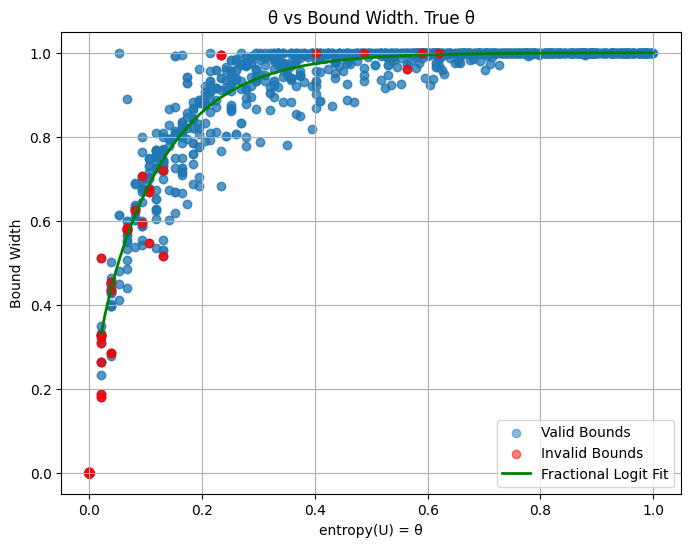

In [24]:
PlottingUtil.print_bound_statistics_table(results, ['ATE_entropybounds-trueTheta', 'ATE_tianpearl'], 'ATE')
PlottingUtil.plot_trueEntropyUB_vs_bound_width(results, 'ATE_entropybounds-trueTheta')


                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
              PNS_tianpearl          0.00             5.70          0.2643      0.3063          3.02
PNS_entropybounds-trueTheta          0.00             0.10          0.6789      0.6792          5.42
                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 1998
Model:                            GLM   Df Residuals:                     1995
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.34
Date:                Tue, 10 Jun 2025   Deviance:                       159.94
Time:                        18:41:12   Pearson chi2:                     158.
No. Iterations:                     4   Pseudo R-squ. (CS):      

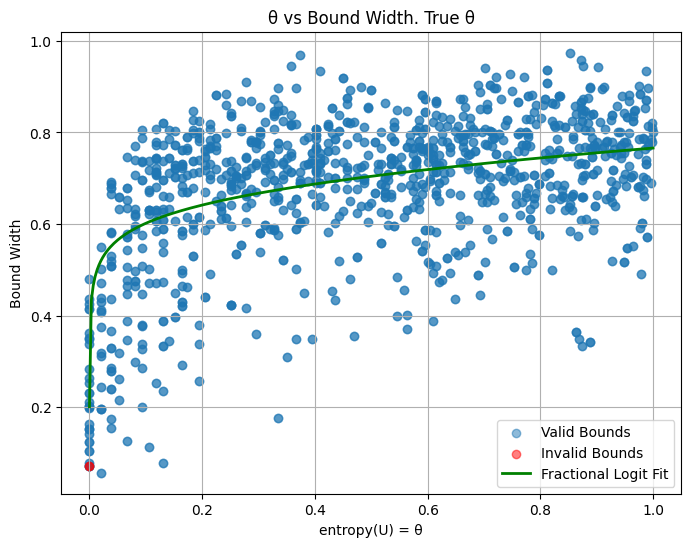

In [25]:
PlottingUtil.print_bound_statistics_table(results, ['PNS_entropybounds-trueTheta', 'PNS_tianpearl'], 'PNS')
PlottingUtil.plot_trueEntropyUB_vs_bound_width(results, 'PNS_entropybounds-trueTheta')


## Randomized Theta

In [84]:
data
binaryIV.run(['PNS_entropybounds-randomTheta'])
results_randomTheta = binaryIV.data

Running PNS_entropybounds-randomTheta...


d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\entropybounds.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.at[idx, f"{query}_entropybounds-{theta_rounded}_bound_width"] = bounds_width
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\entropybounds.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.at[idx, f"{query}_entropybounds-{theta_rounded}_bound_failed"] = failed
d:\TUM Workspace\Thesis Workspace\causal-boun

PNS_entropybounds-randomTheta completed in 85.37 seconds.
Total runtime: 85.40 seconds.


In [22]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(results, ['PNS_entropybounds-randomTheta'], 'PNS')


                    Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Avg. Invalid dist.
PNS_entropybounds-randomTheta           N/A              N/A             N/A                N/A


                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -844.31
Date:                Tue, 10 Jun 2025   Deviance:                       146.53
Time:                        15:10:07   Pearson chi2:                     144.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01931
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2553      0.294      4.266      0.0

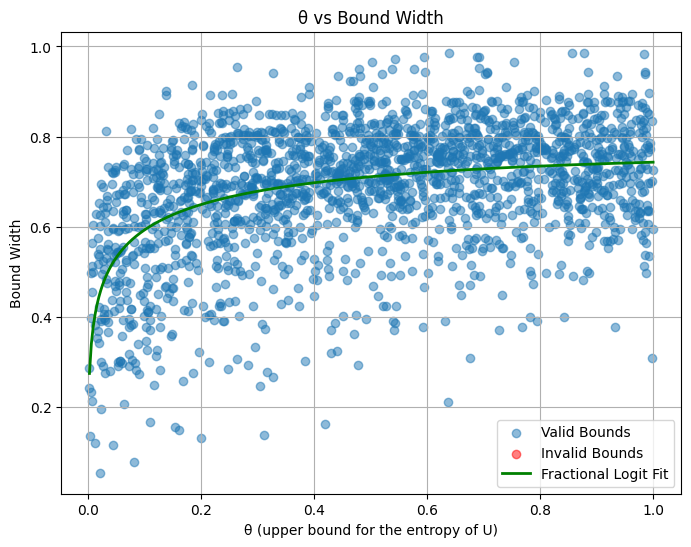

In [93]:
PlottingUtil.randomized_entropyUB_vs_bound_width(results, 'PNS_entropybounds-randomTheta')